In [1]:
import os
path = 'C:/Users/jzsmo/OneDrive/Documentos/GitHub/likelihood'
os.chdir(path)

from likelihood.regression_models import arima, fourier_regression
from likelihood.tools import *
import numpy as np
import matplotlib.pyplot as plt 

plt.rcParams['font.size'] = 12
plt.style.use('bmh')

path = 'C:/Users/jzsmo/OneDrive/Documentos/GitHub/likelihood/examples'
os.chdir(path)

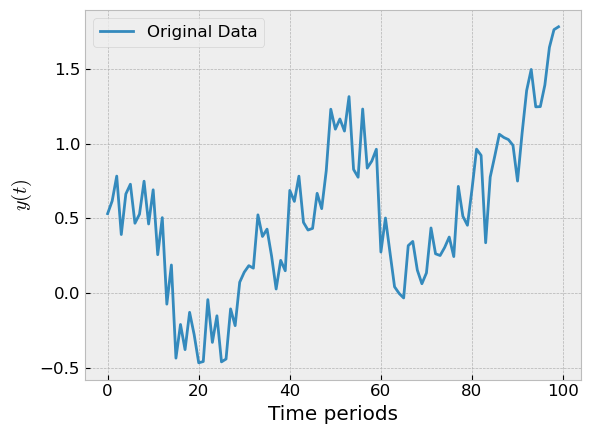

In [2]:
# We generate a time series with 25 points and with slope
a = generate_series(2, 100, incline=True)
y_serie = np.copy(a)

# Graph the data for visualization
plt.plot(range(len(y_serie[0, :])), y_serie[0, :], label = 'Original Data')
plt.legend()
plt.xlabel('Time periods')
plt.ylabel('$y(t)$')
plt.show()

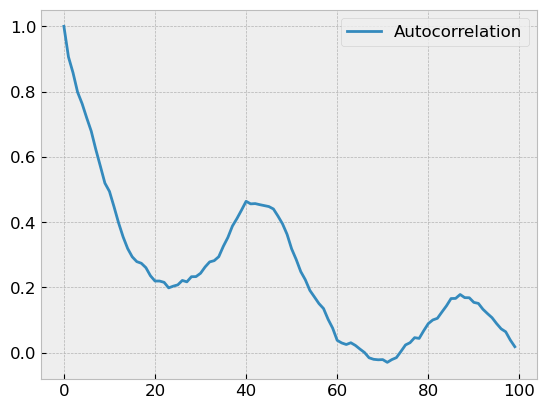

In [3]:
# Calculate periodicity by autocorrelation analysis
z = autocorr(y_serie[0, :])
z.plot()

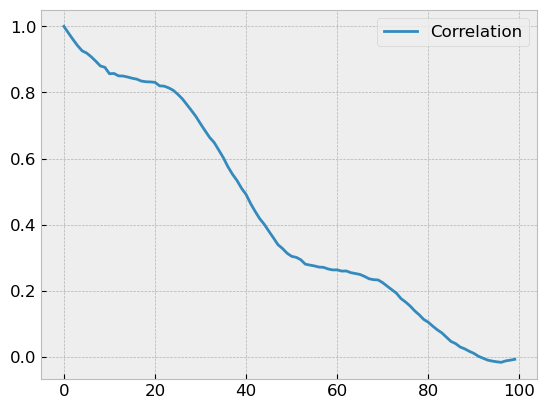

In [4]:
# Calculate the correlation between the time series
z = corr(y_serie[0, :], y_serie[1, :])
z.plot()

Accuracy: 0.3559
RMSE: 1.0252
Confidence Interval: 0.6265


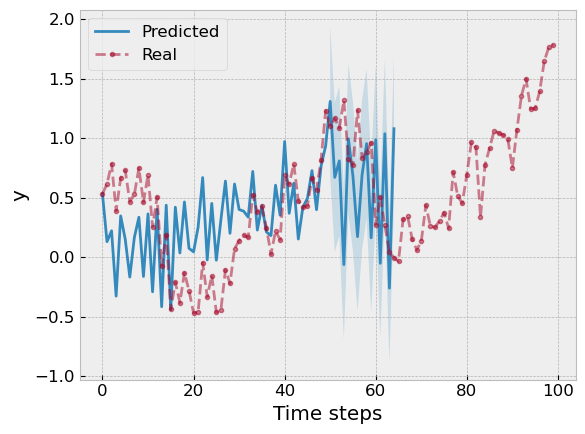


The probability of the data cannot be calculated.


Summary:
--------

Lenght of theta: 50

Mean of theta: 0.2288
------------------------------------------------------------------


In [5]:
alpha, p, d, q = 0.1, 1, 1, 0
# Standardize the data and subtract the slope
y_scale, values = rescale(a)
y_train = y_scale[0, :50]
y_val = y_scale[0, 50:]
# We define the regression model
model = arima(y_train, p=p, d=d, q=q, alpha=alpha)
model.train(nwalkers = 15)
model.save_model('model')
model = arima(y_train, p=p, d=d, q=q, alpha=alpha)
model.load_model('model')
# We predict 15 points forward
y_pred = model.predict(15)
model.eval(y_val[:15], y_pred[-15])
y_pred = y_pred[..., np.newaxis]
y_pred = y_pred.reshape(-1, y_pred.shape[0])
y_pred = scale(y_pred, values)
model.plot_pred(y_serie[0, :], y_pred[0, :])
p = calculate_probability(y_pred[0, :], 15, cond = False)
model.summary()

The 1-th row of the dataset has been denoised.
The period is 50.0
The 2-th row of the dataset has been denoised.
The period is 25.0
Confidence Interval: 0.1759


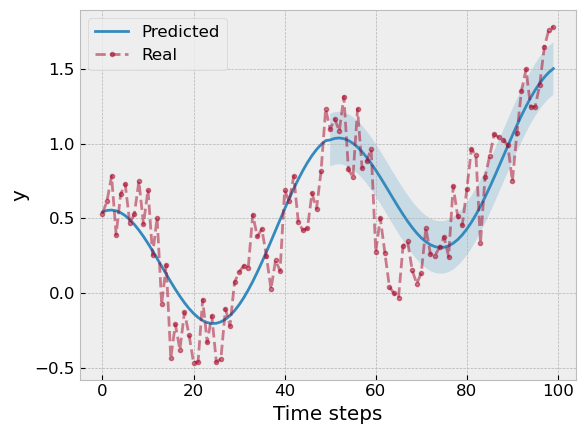

The model has a probability of 67.78% of being correct
The RMSE is 0.25561156825595505


In [6]:
second_model = fourier_regression(y_scale[:, :50])
second_model.fit(sigma = 1, mov = 300, mode = True)
y_pred_second = second_model.predict(50, n_walkers = 15, name = 'fourier_model', save = True)
y_pred = scale(y_pred_second, values)
second_model.plot_pred(y_serie[0, :], y_pred[0, :])
second_model = fourier_regression(y_scale[:, :50], 50)
second_model.fit(sigma = 1)
y_pred = scale(second_model.load_predict('fourier_model'), values)
p = calculate_probability(y_pred[0, :], 50)
rmse = RMSE(y_serie[0, :], y_pred[0, :])

Confidence Interval: 0.5830


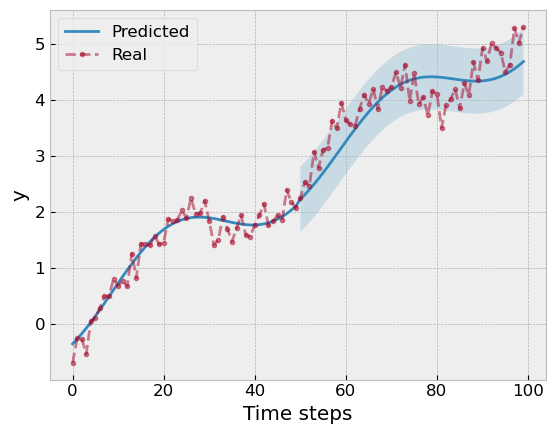

The model has a probability of 24.21% of being correct


In [7]:
second_model.plot_pred(y_serie[1, :], y_pred[1, :])
p = calculate_probability(y_pred[1, :], 50)

Accuracy: 0.2787
RMSE: 0.6033
Confidence Interval: 1.0344


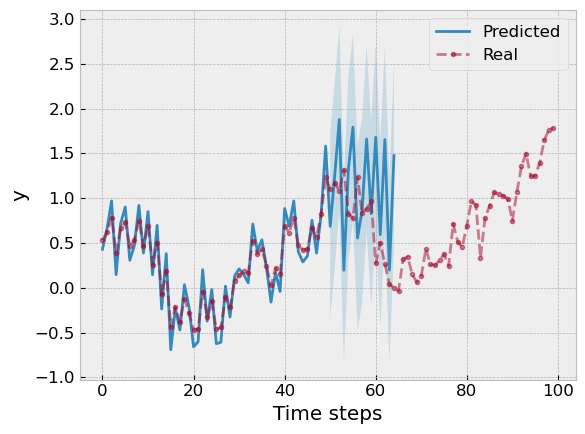

The model has a probability of 16.60% of being correct

Summary:
--------

Lenght of theta: 50

Mean of theta: 6.6151
------------------------------------------------------------------


In [8]:
# Can we improve the model by changing the number of mov?
model.train(nwalkers = 15, mov = 300, weights = False)
model.save_model('model_loaded')
model_loaded = arima(y_train)
model_loaded.load_model('model_loaded')
y_pred = model_loaded.predict(15)
model_loaded.eval(y_val[:15], y_pred[-15])
y_pred = y_pred[..., np.newaxis]
y_pred = y_pred.reshape(-1, y_pred.shape[0])
y_pred = scale(y_pred, values)
model_loaded.plot_pred(y_serie[0, :], y_pred[0, :])
p = calculate_probability(y_pred[0, :], 15, cond = False)
model_loaded.summary()